© 2025 Yegor Tkachenko. 

Python, Deep Learning, and LLMs: A Crash Course for Complete Beginners.

Selected code from *Chapter 5: Deep learning*.

Version: 2025-09-03. https://python2llms.org. 

In [1]:
import numpy as np

# example - a single input observation (3 variables)
x = np.array([-5.2, -0.7, 0.3])  

# initializing parameters for a single neuron via standard normal distribution
np.random.seed(42)
w = np.random.randn(3)  # 3 weights
b = np.random.randn()   # bias (intercept)

# ReLU
def relu(x):
    return np.maximum(x, 0)

# computation
z = np.dot(w, x) + b
out = relu(z)

print("Weights w:", w)
print("Bias b:", b)
print("Linear output (z):", z)
print("ReLU activation:", out)

Weights w: [ 0.49671415 -0.1382643   0.64768854]
Bias b: 1.5230298564080254
Linear output (z): -0.7687921670003479
ReLU activation: 0.0


In [2]:
import numpy as np

# example - n=5 observations, each with 3 input variables
X = np.array([
    [1.2, -0.7, 0.3],
    [0.5,  1.1, -1.4],
    [-0.3, 0.8, 0.9],
    [2.0, -1.0, 0.1],
    [0.0, 0.0, 0.0]
])  # shape: (5, 3)

# random weights and biases for two layers of neurons
np.random.seed(42)
W1 = np.random.randn(3, 4)     # shape: (3, 4)
b1 = np.random.randn(1, 4)     # shape: (1, 4)
W2 = np.random.randn(4, 1)     # shape: (4, 1)
b2 = np.random.randn(1, 1)     # shape: (1, 1)

# activation function
def relu(x):
    return np.maximum(0, x)

# forward pass / computation 
Z = relu(X @ W1 + b1)           # shape: (5, 4)
y_hat = Z @ W2 + b2             # shape: (5, 1)

# X @ W1 is a dot product, same as np.dot(X, W1)

print("Predictions (y_hat):", y_hat)

Predictions (y_hat): [[-0.2375191 ]
 [-2.72450733]
 [ 1.46564877]
 [-2.33341581]
 [ 1.22058185]]


In [3]:
import pandas as pd
import requests # url access
from bs4 import BeautifulSoup # html parsing
from io import StringIO # for pandas to accept html

var_names = ["life-expectancy-at-birth",
"real-gdp-per-capita", 
"obesity-adult-prevalence-rate", 
"alcohol-consumption-per-capita"]

url_template = "https://www.cia.gov/the-world-factbook/field/{}/country-comparison/"

# web scraping
data_list = []
for var in var_names:
    url = url_template.format(var)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    table = soup.select_one(".content-table") # css selector 
    df = pd.read_html(StringIO(str(table)))[0]
    df = df.rename(columns={df.columns[2]: var})
    data_list.append(df.iloc[:,[1,2]]) # storing country and metric cols

# merging
data = pd.concat([df.set_index('Country') for df in data_list], 
                 axis=1, join='inner').dropna().reset_index()

# converting GDP string to float
data.loc[:,'real-gdp-per-capita'] = data['real-gdp-per-capita'
    ].str.replace("$","").str.replace(",","").astype(float)

data.to_csv('life_expectancy_data.csv', index=False)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('./life_expectancy_data.csv')

data.columns

Index(['Country', 'life-expectancy-at-birth', 'real-gdp-per-capita',
       'obesity-adult-prevalence-rate', 'alcohol-consumption-per-capita'],
      dtype='object')

In [5]:
# OPTIONAL: settings to make figures look nicer
# see documentation: https://matplotlib.org/stable/api/rcsetup_api.html
import matplotlib as mpl
from cycler import cycler # color cycling

colors = mpl.color_sequences["petroff10"] # https://arxiv.org/abs/2107.02270
# mpl.colormaps['tab20'].colors
plt.rcParams.update({
    'figure.dpi' : 300,
    'savefig.dpi' : 300,
    'text.usetex' : True, # requires latex installed
    'font.size': 11,
    'axes.labelsize': 11,
    'legend.fontsize': 11,
    'axes.prop_cycle' : cycler('color', colors),
    'figure.autolayout': True,
    'savefig.bbox': 'tight',
})

In [6]:
data['real-gdp-per-capita'] = np.log(data['real-gdp-per-capita'])  # taking log GDP

print(data.shape)
print(data.head(3).T)

(188, 5)
                                        0          1          2
Country                         Singapore      Japan     Canada
life-expectancy-at-birth             86.7       85.2       84.2
real-gdp-per-capita             11.795092  10.738568  10.945529
obesity-adult-prevalence-rate         6.1        4.3       29.4
alcohol-consumption-per-capita       1.81       8.36        8.0


In [7]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

print("Input data X shape:", X.shape)
print("Prediction target y shape:",y.shape)

Input data X shape: (188, 3)
Prediction target y shape: (188,)


In [8]:
y = y[:,np.newaxis] # reshaping
print("Prediction target y shape:",y.shape)

Prediction target y shape: (188, 1)


In [9]:
np.random.randn(4,3)

array([[-0.2257763 ,  0.0675282 , -1.42474819],
       [-0.54438272,  0.11092259, -1.15099358],
       [ 0.37569802, -0.60063869, -0.29169375],
       [-0.60170661,  1.85227818, -0.01349722]])

In [10]:
def initialize_net(input_size, hidden_size, output_size):
    np.random.seed(999)
    net = {}
    net['W1'] = np.random.randn(input_size, hidden_size)
    net['b1'] = np.zeros((1, hidden_size))
    net['W2'] = np.random.randn(hidden_size, output_size)
    net['b2'] = np.zeros((1, output_size))
    return net

In [11]:
net = initialize_net(3, 4, 1)
net

{'W1': array([[ 0.12715784,  1.40189088,  0.31481499, -0.85844916],
        [-0.26613444, -0.64890071,  1.56626757, -2.09137019],
        [ 1.45632806,  0.94529342, -0.40020119,  0.3152273 ]]),
 'b1': array([[0., 0., 0., 0.]]),
 'W2': array([[-1.11006083],
        [-0.58482153],
        [-0.18840956],
        [ 0.81302365]]),
 'b2': array([[0.]])}

In [12]:
# unpacking
W1, b1, W2, b2 = net['W1'], net['b1'], net['W2'], net['b2']
N, D = X.shape

# non-linearity function - elementwise maximum
relu = lambda x: np.maximum(x, 0)

# forward pass - for input data X
Z = relu(X.dot(W1) + b1)
y_hat = Z.dot(W2) + b2
print("Prediction shape:", y_hat.shape)

# MSE between prediction and data y
pred_error = y_hat - y
print("Prediction error (residual) shape:", pred_error.shape)

print("MSE:", np.mean(pred_error**2))
print("MSE (using dot product):", np.dot(pred_error.T, pred_error)/N )

Prediction shape: (188, 1)
Prediction error (residual) shape: (188, 1)
MSE: 7931.881911375143
MSE (using dot product): [[7931.88191138]]


In [13]:
# full loss accounting for regularization

# mse
loss = np.dot(pred_error.T, pred_error) / N

# regularization (optimizing to shrink parameter magnitude too)
reg = 0.01
loss += 0.5 * reg * (np.sum(W1*W1) + np.sum(W2*W2))

In [14]:
grads = {}

grads['W2'] = np.zeros_like(W2)
grads['b2'] = np.zeros_like(b2)
grads['W1'] = np.zeros_like(W1)
grads['b1'] = np.zeros_like(b1)

dMSE_dy_hat = 2*(y_hat - y)

grads['W2'] += Z.T.dot(dMSE_dy_hat) / N
grads['W2'] += reg * W2  # regularization for non-intercept parameters

grads['b2'] += np.ones((1,N)).dot(dMSE_dy_hat) / N 

dMSE_dZ = dMSE_dy_hat.dot(W2.T)

grads['W1'] += X.T.dot((Z>0) * dMSE_dZ) / N
grads['W1'] += reg * W1

grads['b1'] += np.ones((1,N)).dot((Z>0) * dMSE_dZ) / N

for k,v in grads.items():
    print(k+":\n", np.round(v,3))

W2:
 [[-7.922770e+02]
 [-1.186301e+03]
 [-5.682298e+03]
 [ 8.000000e-03]]
b2:
 [[-176.732]]
W1:
 [[ 1.412741e+03  8.333940e+02  3.215070e+02 -9.000000e-03]
 [ 2.569732e+03  1.463900e+03  6.626120e+02 -2.100000e-02]
 [ 9.501560e+02  5.029160e+02  1.709570e+02  3.000000e-03]]
b1:
 [[143.929  85.768  33.298   0.   ]]


In [15]:
def run_net(X, net, y=None, reg=0.01):

    W1, b1, W2, b2 = net['W1'], net['b1'], net['W2'], net['b2']
    N, D = X.shape

    relu = lambda x: np.maximum(x, 0)

    # forward pass - computing prediction
    Z = relu(X.dot(W1) + b1)
    y_hat = Z.dot(W2) + b2

    # if we do not provide prediction target y
    # simply do a forward pass and return prediction y_hat
    if y is None:
        return y_hat

    # loss function
    pred_error = y_hat - y
    MSE = np.dot(pred_error.T, pred_error) / N

    # L2 regularization
    loss = MSE + 0.5 * reg * (np.sum(W1*W1) + np.sum(W2*W2)) 

    # backward pass - computing gradients
    grads = {}

    grads['W2'] = np.zeros_like(W2)
    grads['b2'] = np.zeros_like(b2)
    grads['W1'] = np.zeros_like(W1)
    grads['b1'] = np.zeros_like(b1)

    dMSE_dy_hat = 2*(y_hat - y)

    grads['W2'] += Z.T.dot(dMSE_dy_hat) / N
    grads['W2'] += reg * W2
    grads['b2'] += np.ones((1,N)).dot(dMSE_dy_hat) / N 

    dMSE_dZ = dMSE_dy_hat.dot(W2.T)

    grads['W1'] += X.T.dot((Z>0) * dMSE_dZ) / N
    grads['W1'] += reg * W1
    grads['b1'] += np.ones((1,N)).dot((Z>0) * dMSE_dZ) / N    

    return loss.item(), MSE.item(), grads

In [16]:
loss, MSE, grads = run_net(X, net, y=y)
print("Parameter arrays:", grads.keys())
print("MSE:", MSE)

Parameter arrays: dict_keys(['W2', 'b2', 'W1', 'b1'])
MSE: 7931.8819113751415


In [17]:
losses = []
MSEs = []
learning_rate = 0.0001
for i in range(100000):
    loss, MSE, grads = run_net(X, net, y=y)
    losses.append(loss)
    MSEs.append(MSE)
    # parameter updating - gradient descent
    names = grads.keys()
    for j in names:
        net[j] -= grads[j] * learning_rate

In [18]:
print("Initial loss", losses[0])
print("Final loss", losses[-1])

Initial loss 7931.960317329427
Final loss 15.667574456851568


In [19]:
print("Initial MSE", MSEs[0])
print("Final MSE", MSEs[-1])

Initial MSE 7931.8819113751415
Final MSE 15.527824145614485


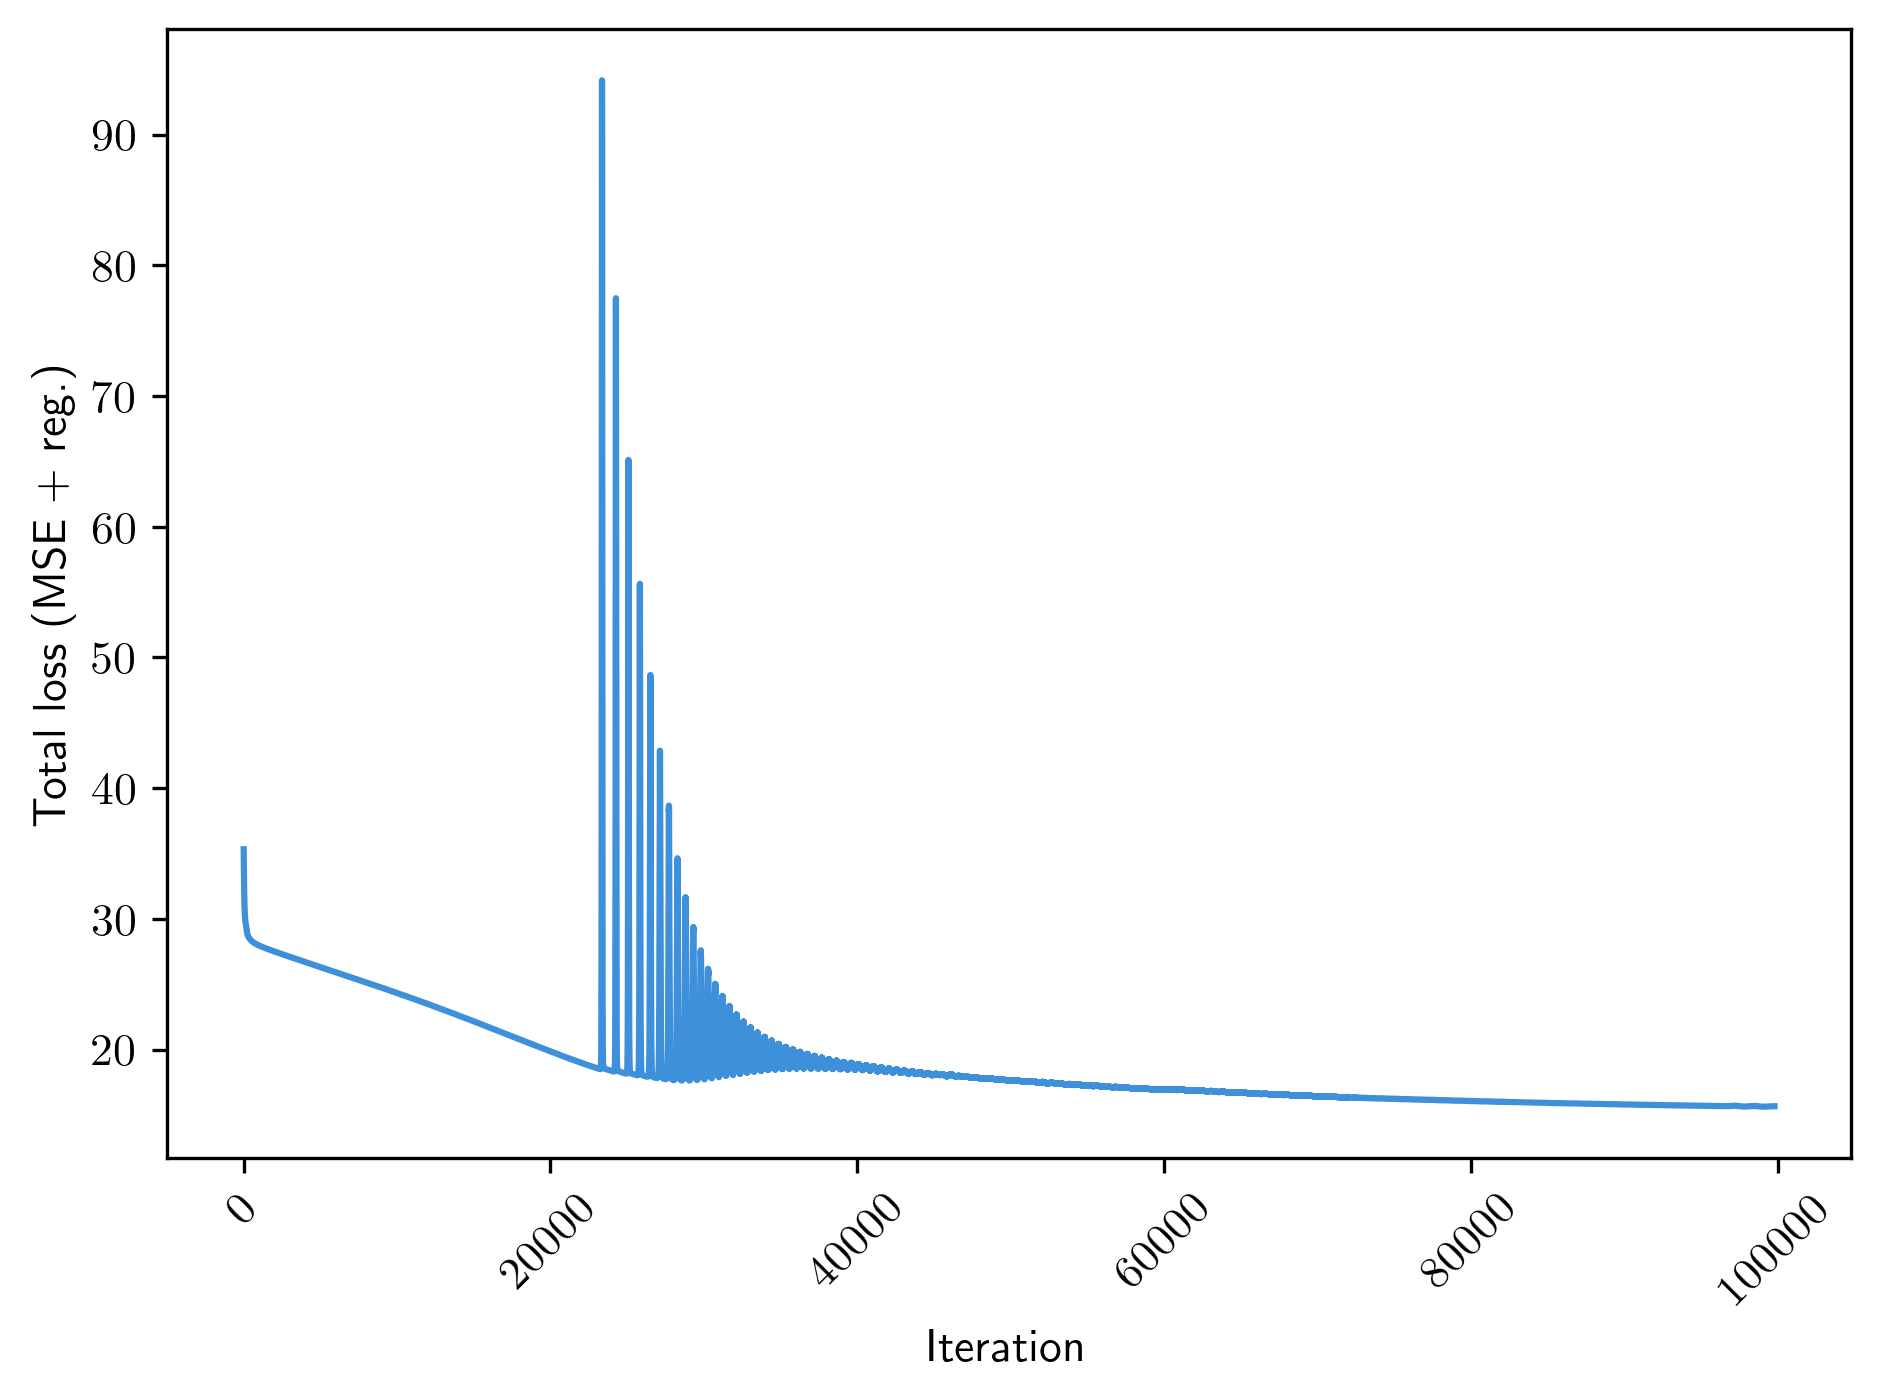

In [20]:
plt.plot(losses[200:])
plt.ylabel("Total loss (MSE + reg.)")
plt.xlabel("Iteration")
plt.xticks(rotation=45)
plt.show()

In [21]:
Xn = np.append( np.ones(X.shape[0])[:,np.newaxis],  X,  1)
beta = np.linalg.inv(Xn.T.dot(Xn)).dot(Xn.T.dot(y))
print('Linear regression MSE:', np.mean((y-Xn.dot(beta))**2))

Linear regression MSE: 15.888872357934282


In [22]:
print("Neural net MSE", MSEs[-1])

Neural net MSE 15.527824145614485


In [23]:
# reset net
net = initialize_net(3, 4, 1)
s = {} # squared gradient accumulator
for j in net.keys():
    s[j] = np.zeros_like(net[j])
losses = []
MSEs = []
learning_rate = 0.0001
rho = 0.9
eps = 1e-8
for i in range(100000):
    loss, MSE, grads = run_net(X, net, y=y)
    losses.append(loss)
    MSEs.append(MSE)
    # update gradient magnitude estimate
    for j in net.keys():
        s[j] = rho*s[j] + (1-rho)*grads[j]**2
    # parameter updating with RMSprop
    for j in net.keys():
        net[j] -= grads[j]*learning_rate/(s[j]**0.5+eps)

print("Initial MSE", MSEs[0])
print("Final MSE", MSEs[-1])

Initial MSE 7931.8819113751415
Final MSE 13.852495772282515


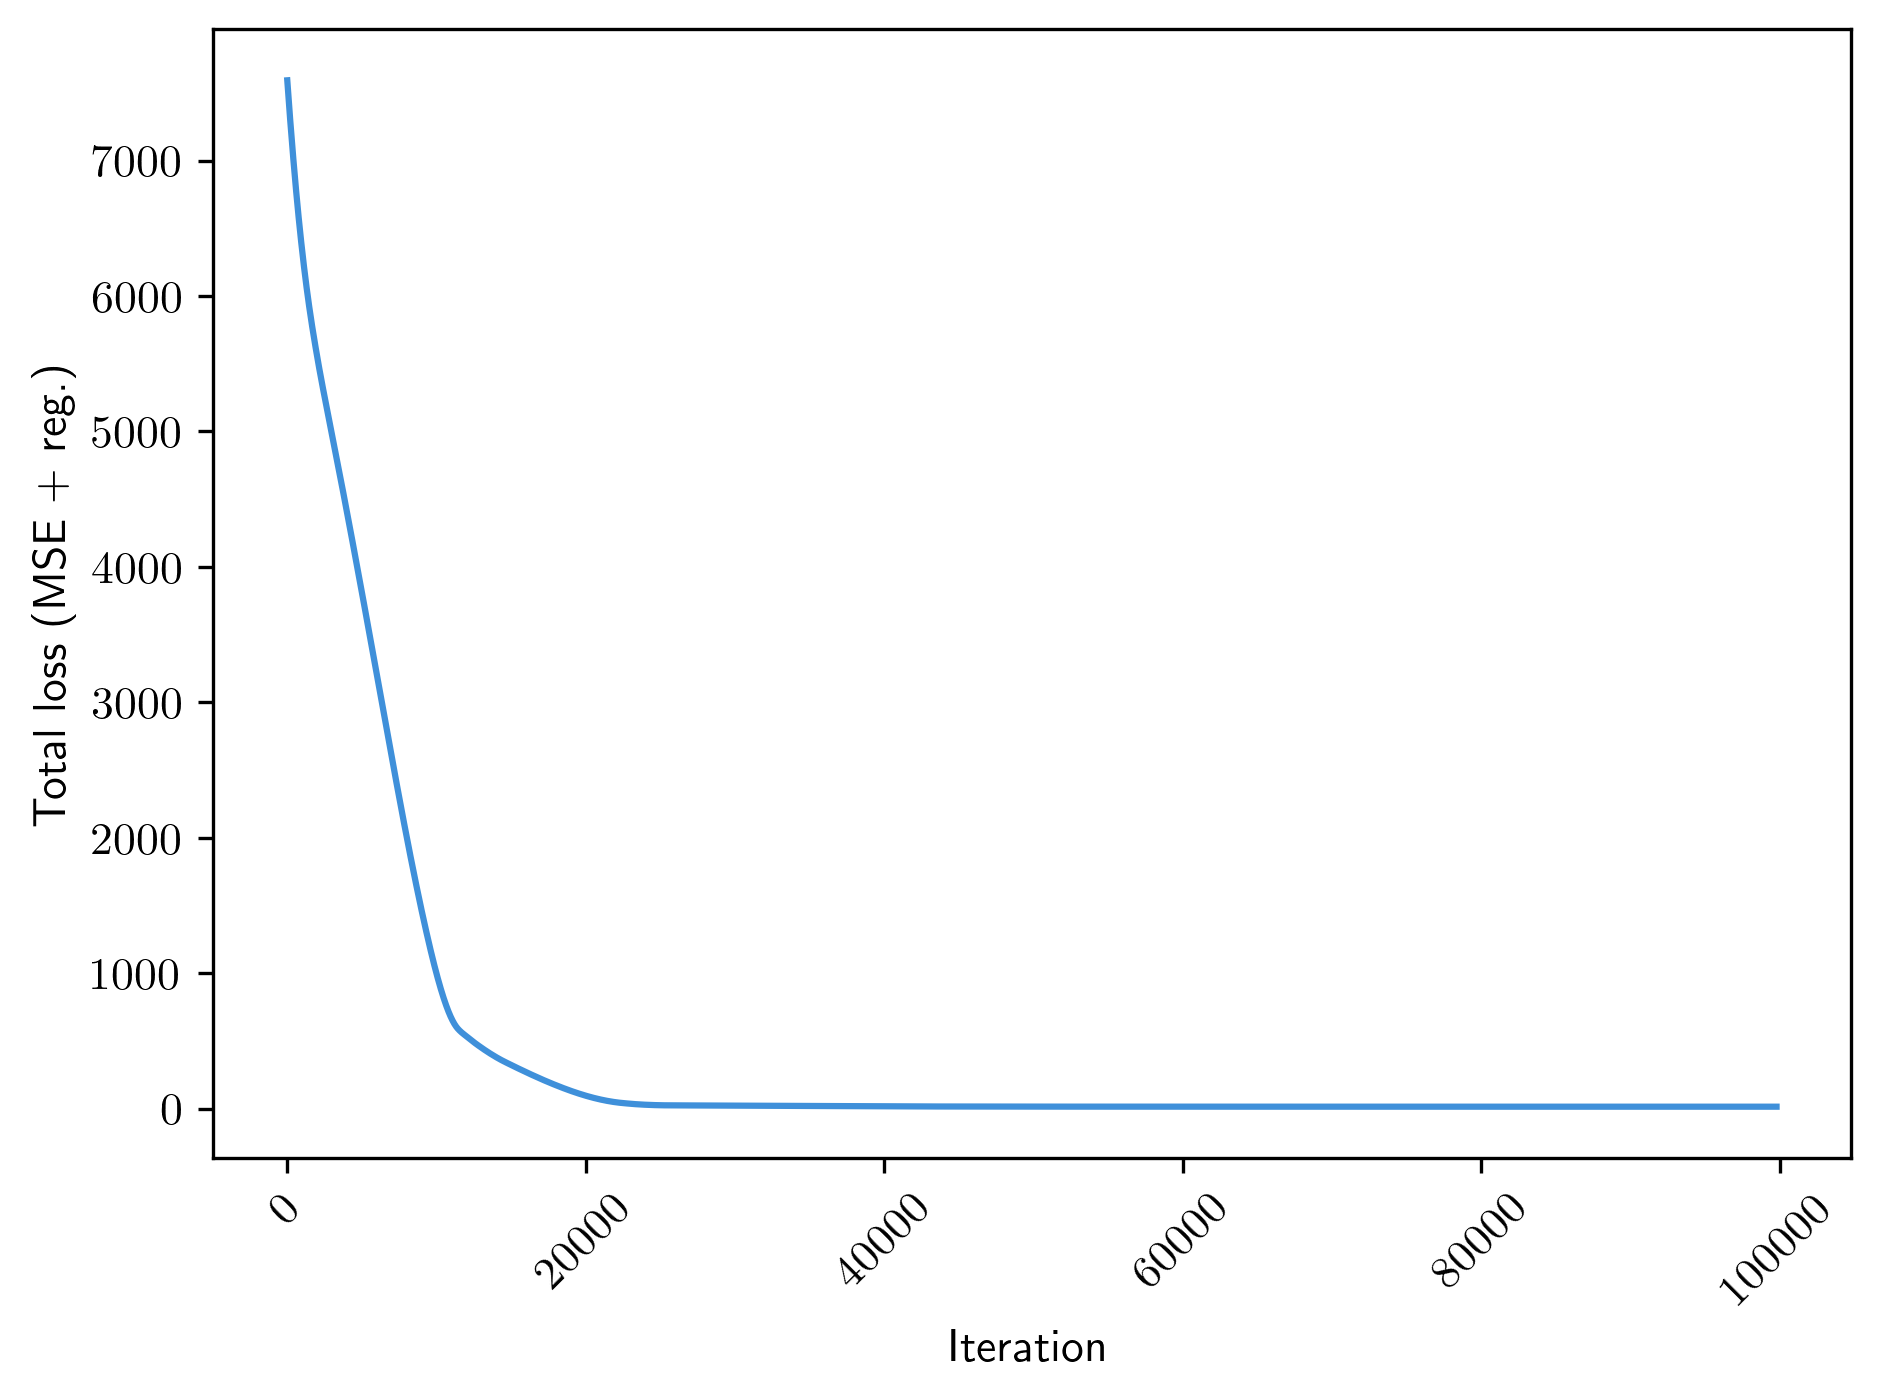

In [24]:
plt.plot(losses[200:])
plt.ylabel("Total loss (MSE + reg.)")
plt.xlabel("Iteration")
plt.xticks(rotation=45)
plt.show()

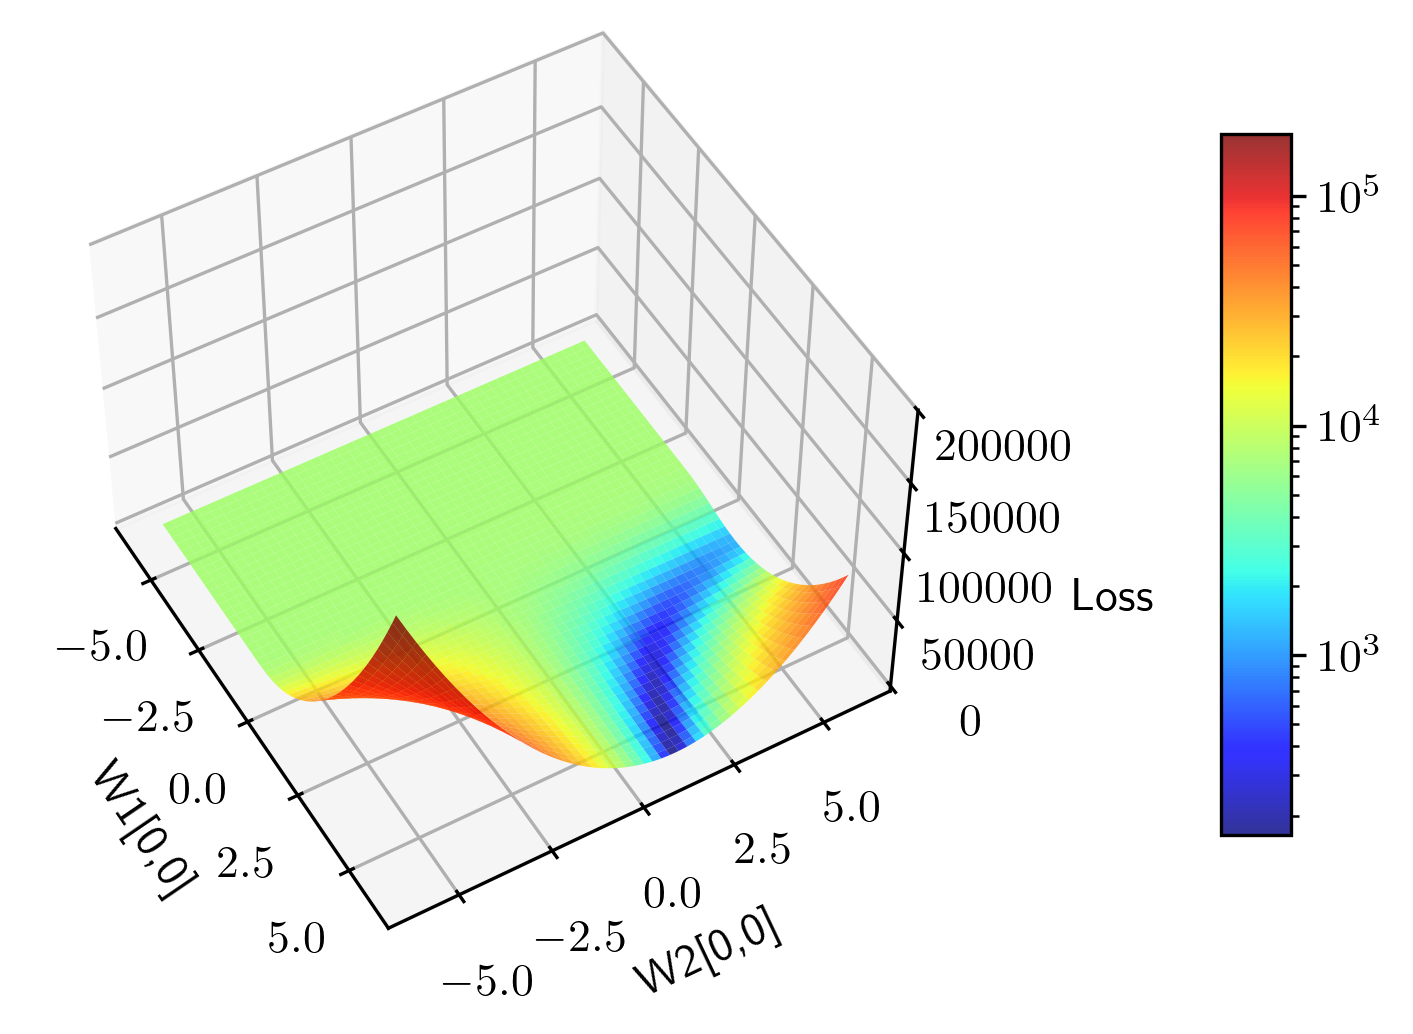

In [25]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

# duplicate net learned via RMSprop
net = initialize_net(3, 4, 1)

# neural net loss function
def mse_mod(wa, wb):
    net['W1'][0,0] = wa
    net['W2'][0,0] = wb
    loss, MSE, _ = run_net(X, net, y=y)
    return loss

# create a meshgrid around learned weights
a = np.linspace(-6, 6, 200)
b = np.linspace(-6, 6, 200)
A, B = np.meshgrid(a, b)

# compute function values
Z = np.zeros_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        Z[i, j] = mse_mod(A[i, j], B[i, j])

# neural net loss plot
fig, ax = plt.subplots(1, 1, figsize=(5, 5), subplot_kw=dict(projection='3d'))
surf = ax.plot_surface(A, B, Z, alpha=0.8, cmap='jet', norm=LogNorm())
ax.set_xlabel("W1[0,0]")
ax.set_ylabel("W2[0,0]")
ax.set_zlabel("Loss", labelpad=8)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, pad=0.2)
ax.view_init(elev=50, azim=-30)
plt.show()

In [26]:
# to install pytorch, uncomment and run:
# !conda install pytorch torchvision -c pytorch

import torch
import torch.nn.functional as F

In [27]:
torch.manual_seed(1234)
np.random.seed(1234)

In [28]:
ind = list(range(X.shape[0]))
np.random.shuffle(ind)
n = int(X.shape[0]*0.6)
idx_train, idx_test = ind[:n], ind[n:]

X_train = X[idx_train]
y_train = y[idx_train]

X_test = X[idx_test]
y_test = y[idx_test]

In [29]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

In [30]:
net = torch.nn.Sequential(
    torch.nn.Linear(3,4),
    torch.nn.ReLU(),
    torch.nn.Linear(4,1)
)

In [31]:
optimizer = torch.optim.RMSprop(
    net.parameters(), lr=0.0001, weight_decay=0.01)

In [32]:
mse = torch.nn.MSELoss()

In [33]:
losses = []
for i in range(100000):
    y_train_pred = net(X_train)
    train_loss = mse(y_train_pred, y_train)
    optimizer.zero_grad() # zero out gradient storage
    train_loss.backward() # compute gradients
    optimizer.step()      # update parameters using gradients

    # loss tracking code - evaluate every 10000 steps
    if ((i+1) % 10000 == 0):
        # disable gradient tracking inside the scope
        with torch.no_grad():  
            y_test_pred = net(X_test)
            test_loss = mse(y_test_pred, y_test)
            losses.append({
                "Train": train_loss.item(), 
                "Test": test_loss.item(),
                "Iter": i,
                })
        print(f"Step {i}: " 
              f"Train loss = {train_loss.item():.4f}, " 
              f"Test loss = {test_loss.item():.4f}")

Step 9999: Train loss = 814.5470, Test loss = 828.2895
Step 19999: Train loss = 209.6220, Test loss = 219.0393
Step 29999: Train loss = 17.0300, Test loss = 36.7629
Step 39999: Train loss = 12.8890, Test loss = 29.1695
Step 49999: Train loss = 11.4556, Test loss = 24.7408
Step 59999: Train loss = 11.3552, Test loss = 23.9127
Step 69999: Train loss = 11.3547, Test loss = 23.9036
Step 79999: Train loss = 11.3545, Test loss = 23.8974
Step 89999: Train loss = 11.3541, Test loss = 23.8902
Step 99999: Train loss = 11.3539, Test loss = 23.8833


Step 19999: Train loss = 209.6220, Test loss = 219.0393


Step 29999: Train loss = 17.0300, Test loss = 36.7629


Step 39999: Train loss = 12.8890, Test loss = 29.1695


Step 49999: Train loss = 11.4556, Test loss = 24.7408


Step 59999: Train loss = 11.3552, Test loss = 23.9127


Step 69999: Train loss = 11.3547, Test loss = 23.9036


Step 79999: Train loss = 11.3545, Test loss = 23.8974


Step 89999: Train loss = 11.3541, Test loss = 23.8902


Step 99999: Train loss = 11.3539, Test loss = 23.8833


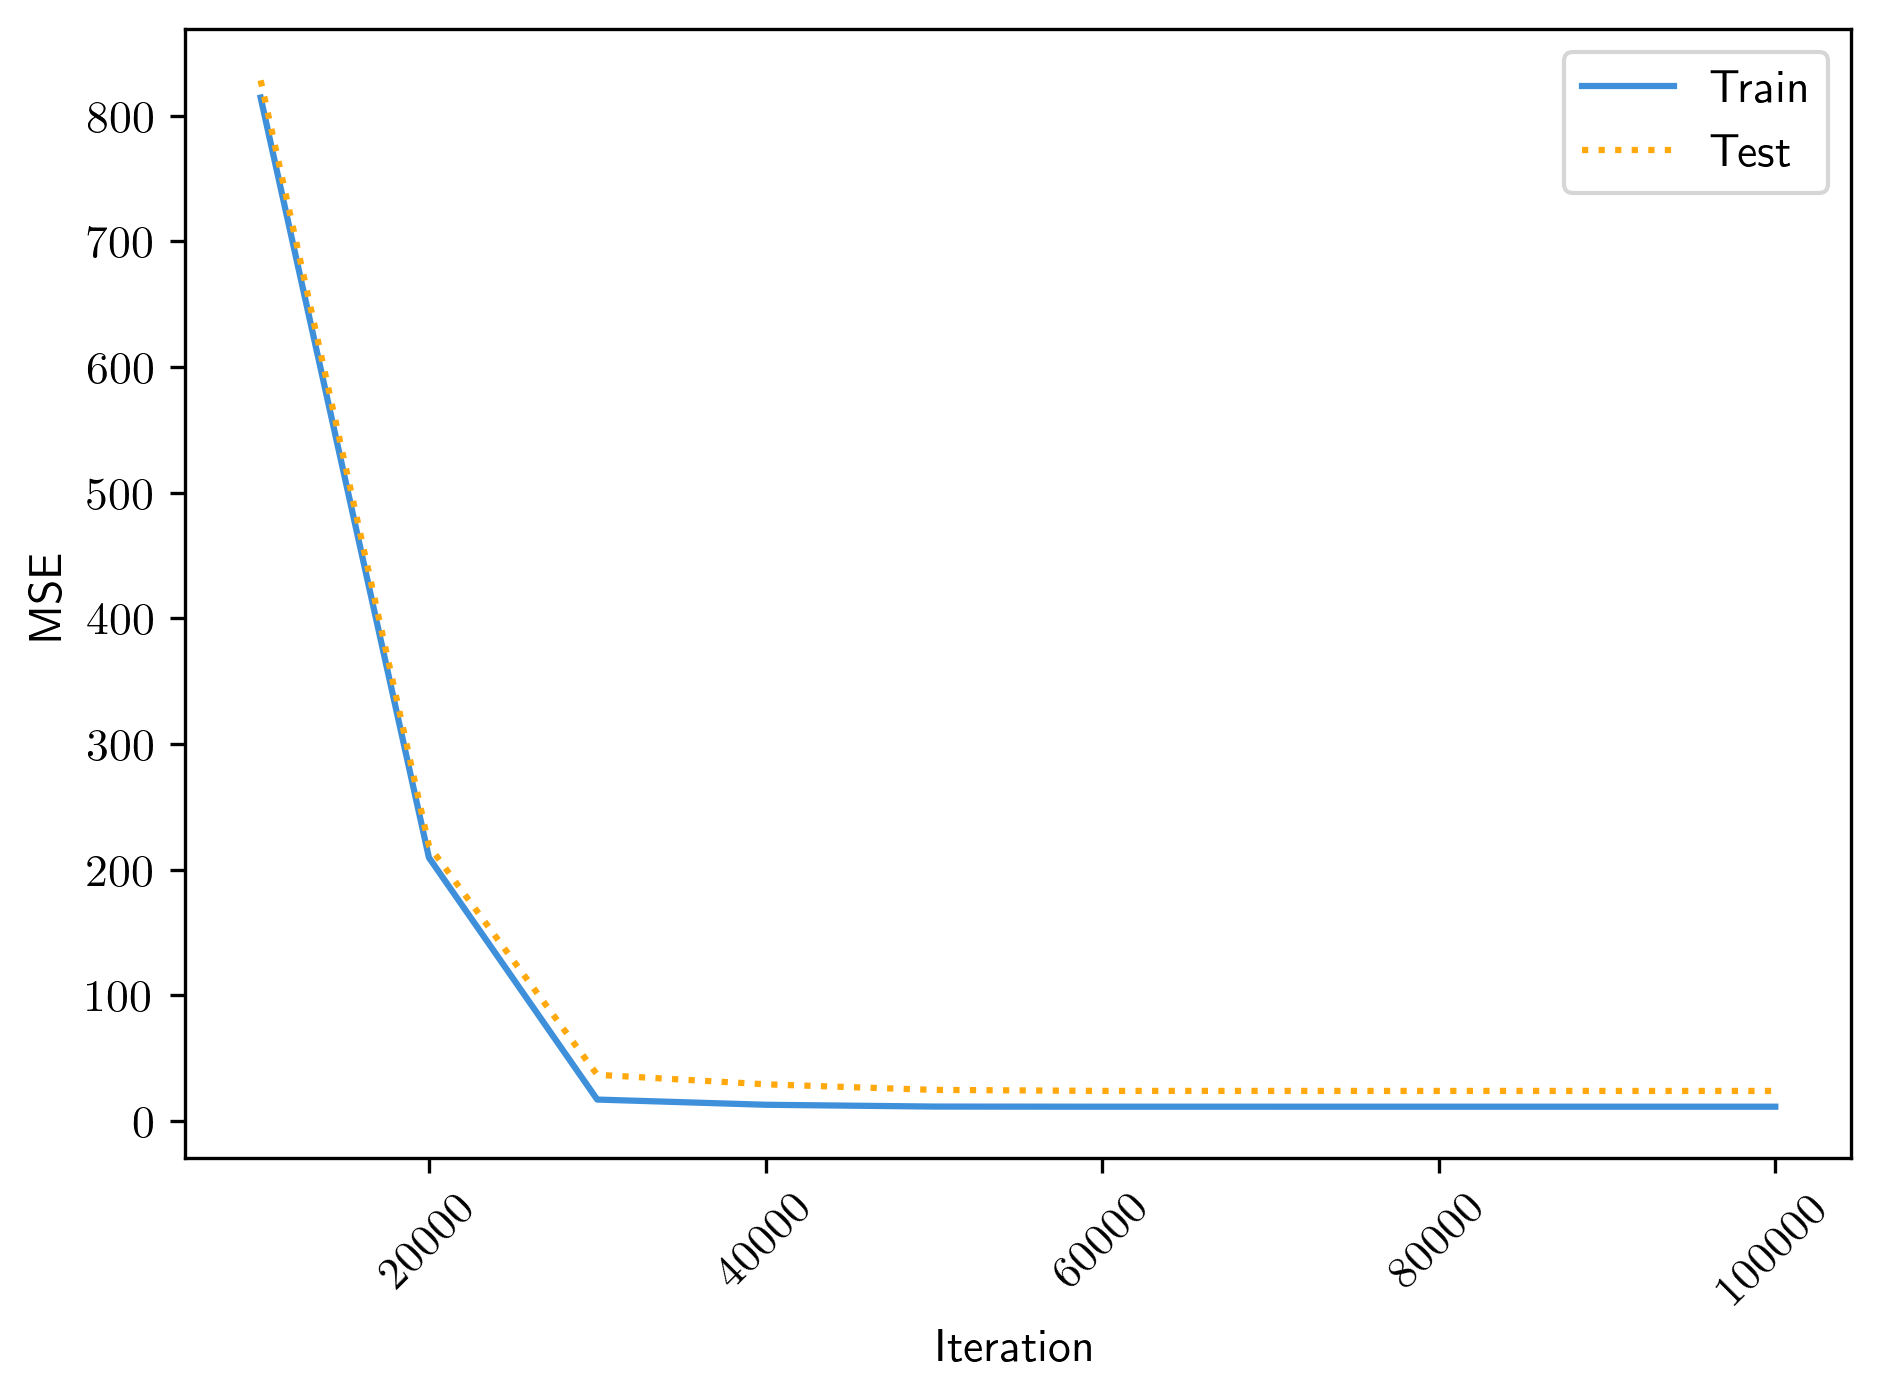

In [34]:
losses = pd.DataFrame(losses)
plt.plot(losses['Iter'],losses['Train'],label='Train')
plt.plot(losses['Iter'],losses['Test'],label='Test',ls=":")
plt.ylabel('MSE')
plt.xlabel('Iteration')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [35]:
# final evaluation (we could get it from losses dataframe too)
with torch.no_grad():
    print('Train set MSE:',mse(net(X_train), y_train).item())
    print('Test set MSE:',mse(net(X_test), y_test).item())

Train set MSE: 11.35384464263916
Test set MSE: 23.883264541625977


In [36]:
y_test_pred = net(X_test).numpy(force=True)

In [37]:
torch.manual_seed(1234)

def bootstrap_mse(X, y):
    n = X.shape[0]
    ind = torch.randint(0, n, (n,))
    X_b, y_b = X[ind], y[ind] # bootstrap sample
    with torch.no_grad(): 
        y_b_pred = net(X_b)
        out = mse(y_b_pred, y_b).item()
    return out

mse_b_estimates = []
for i in range(1000):
    mse_b_estimates.append(
        bootstrap_mse(X_test, y_test))

print(f"Median test MSE: {np.median(mse_b_estimates):.2f}")
print("CI 95% (2.5th, 97.5th percentile): "
      f"{np.percentile(mse_b_estimates, 2.5):.2f}, "
      f"{np.percentile(mse_b_estimates,97.5):.2f}")

Median test MSE: 23.83
CI 95% (2.5th, 97.5th percentile): 15.88, 33.34


In [38]:
# A variable is a dict that stores:
# - value: the current numeric value
# - grad: its gradient (starts at 0, filled in later)
# - prev: inputs used to compute the variable
# - backward: function to compute its local gradients
def create_var(value):
    return {'value': value, 'grad': 0.0, 'prev': [], 'backward': lambda: None}

# define addition operation with autodiff tracking
def add(a, b):
    out = create_var(a['value'] + b['value'])
    out['prev'] = [a, b] # added variables

    # how the gradient flows backward through addition
    # the gradient with respect to a and b is just 1 * the output gradient 
    # (d(a+b)/da = 1)
    def _backward():
        a['grad'] += 1.0 * out['grad']
        b['grad'] += 1.0 * out['grad']
    out['backward'] = _backward
    return out

# define multiplication operation with autodiff tracking
def mul(a, b):
    out = create_var(a['value'] * b['value'])
    out['prev'] = [a, b]

    # how the gradient flows backward through multiplication (chain rule)
    # (d(a*b)/da = b)
    def _backward():
        a['grad'] += b['value'] * out['grad']
        b['grad'] += a['value'] * out['grad']
    out['backward'] = _backward
    return out

# ReLU operation
def relu(a):
    out_val = max(0.0, a['value'])
    out = create_var(out_val)
    out['prev'] = [a]
    def _backward():
        a['grad'] += (1.0 if a['value'] > 0 else 0.0) * out['grad']
    out['backward'] = _backward
    return out

# topological sort: ensures we do the backward pass in the correct order
def topological_sort(var, visited=None, order=None):
    if visited is None: visited = set()
    if order is None: order = []
    if id(var) not in visited:
        visited.add(id(var))
        for prev in var['prev']:
            topological_sort(prev, visited, order)
        order.append(var)
    return order

# backward pass: initializes gradient of output to 1, and walks the graph
def backward(var):
    var['grad'] = 1.0  # seed gradient at output
    for node in reversed(topological_sort(var)):
        node['backward']()

In [39]:
x = create_var(2.0)
x2 = mul(x, x)                  # x^2
x3 = mul(x, create_var(3.0))    # 3x
y = add(x2, x3)                 # x^2 + 3x
z = relu(y)                     # ReLU(x^2 + 3x)

backward(z)

print("f(x) =", z['value'])     # should be 10.0
print("df/dx(x) =", x['grad'])  # should be 7.0 if x^2 + 3x > 0

f(x) = 10.0
df/dx(x) = 7.0
